In [1]:
## import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
## use pandas to import data csv, read, and convert to a dataframe
data=os.path.join('..','Data','clean_data','clean_data.csv')
data_df=pd.read_csv(data)
data_df=pd.DataFrame(data_df)
data_df.head()

,incident_id,date,state,city_or_county,latitude,longitude,location_description,n_killed,n_injured,n_guns_involved,...,gun_type,participant_age,participant_age_group,participant_gender,participant_status,participant_type,incident_characteristics,source_url,Population,incidents per capita
0,461105,2013-01-01,Pennsylvania,Mckeesport,40.3467,-79.8559,NaN,0,4,NaN,...,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Shot - Wounded/Injured||Mass Shooting (4+ vict...,http://www.post-gazette.com/local/south/2013/0...,12790505.0,6.980960
1,460726,2013-01-01,California,Hawthorne,33.9090,-118.3330,NaN,1,3,NaN,...,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",http://www.dailybulletin.com/article/zz/201301...,38982847.0,4.182865
2,478855,2013-01-01,Ohio,Lorain,41.4455,-82.1377,Cotton Club,1,3,2.0,...,0::Unknown||1::Unknown,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",http://chronicle.northcoastnow.com/2013/02/14/...,11609756.0,8.823614
3,478925,2013-01-05,Colorado,Aurora,39.6518,-104.8020,NaN,4,0,NaN,...,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,"Shot - Dead (murder, accidental, suicide)||Off...",http://www.dailydemocrat.com/20130106/aurora-s...,5436519.0,5.887959
4,478959,2013-01-07,North Carolina,Greensboro,36.1140,-79.9569,NaN,2,2,2.0,...,0::Handgun||1::Handgun,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",http://www.journalnow.com/news/local/article_d...,10052564.0,8.693305


## Killed, Injured, # Incidents per State
Create a filtered dataframe for the data specific to my exploration.

In [3]:
## get total number killed per state
k_count=data_df.groupby(['state'])
k_count_df=pd.DataFrame(k_count['n_killed'].sum())
k_count_df =k_count_df.rename(columns = {'n_killed': 'total_killed'})
k_count_df.head()

## get total number injured per state
i_count=data_df.groupby(['state'])
i_count_df=pd.DataFrame(i_count['n_injured'].sum())
i_count_df =i_count_df.rename(columns = {'n_injured': 'total_injured'})
i_count_df.head()

## merge the total killed and total injured dataframes
totals_df=pd.merge(k_count_df,i_count_df,on='state',how='outer')
totals_df.head()

,total_killed,total_injured
state,,
Alabama,1880,2998
Alaska,267,325
Arizona,1094,1096
Arkansas,773,1347
California,5562,7644


In [4]:
## get total incidents per state 
inc_count=data_df.groupby(['state'])
inc_count_df=pd.DataFrame(inc_count['incident_id'].count())
inc_count_df =inc_count_df.rename(columns = {'incident_id': '# of incidents'})
inc_count_df.head()

## merge total incidents to the total killed & injured dataframe 
totals_df=pd.merge(totals_df,inc_count_df,on='state',how='outer')
totals_df.head()

,total_killed,total_injured,# of incidents
state,,,
Alabama,1880,2998,5471
Alaska,267,325,1349
Arizona,1094,1096,2328
Arkansas,773,1347,2842
California,5562,7644,16306


In [5]:
## pull incidents per capita by state and 5 year population for each state
cap=data_df.groupby(['state'])
cap_df=pd.DataFrame(cap['incidents per capita'].first())
cap_df=cap_df.sort_values(by = ['incidents per capita'], ascending  = False)
cap_df=cap_df.reset_index()
cap_df.head(10)

pop=data_df.groupby(['state'])
pop_df=pd.DataFrame(pop['Population'].first())
pop_df.head(10)

cap_pop=pd.merge(pop_df,cap_df,on='state',how='left')
cap_pop.head(10)

,state,Population,incidents per capita
0,Alabama,4850771.0,11.278619
1,Alaska,738565.0,18.265149
2,Arizona,6809946.0,3.418529
3,Arkansas,2977944.0,9.543497
4,California,38982847.0,4.182865
5,Colorado,5436519.0,5.887959
6,Connecticut,3594478.0,8.532532
7,Delaware,943732.0,17.854645
8,District of Columbia,672391.0,47.516995
9,Florida,20278447.0,7.411317


In [6]:
## add column to totals df with incidents per capita and state population by merging dataframes 
totals_df=pd.merge(totals_df,cap_pop,on='state',how='left')
totals_df.head()

,state,total_killed,total_injured,# of incidents,Population,incidents per capita
0,Alabama,1880,2998,5471,4850771.0,11.278619
1,Alaska,267,325,1349,738565.0,18.265149
2,Arizona,1094,1096,2328,6809946.0,3.418529
3,Arkansas,773,1347,2842,2977944.0,9.543497
4,California,5562,7644,16306,38982847.0,4.182865


In [7]:
## add columns to dataframe with killed per capita and injured per capita
totals_df['k per 10k']=totals_df['total_killed']/(totals_df['Population']/10000)
totals_df['in per 10k']=totals_df['total_injured']/(totals_df['Population']/10000)
totals_df.head(10)

,state,total_killed,total_injured,# of incidents,Population,incidents per capita,k per 10k,in per 10k
0,Alabama,1880,2998,5471,4850771.0,11.278619,3.875673,6.180461
1,Alaska,267,325,1349,738565.0,18.265149,3.615119,4.400425
2,Arizona,1094,1096,2328,6809946.0,3.418529,1.606474,1.609411
3,Arkansas,773,1347,2842,2977944.0,9.543497,2.595751,4.523255
4,California,5562,7644,16306,38982847.0,4.182865,1.426781,1.960862
5,Colorado,796,1133,3201,5436519.0,5.887959,1.464172,2.084054
6,Connecticut,341,1258,3067,3594478.0,8.532532,0.948677,3.499813
7,Delaware,217,853,1685,943732.0,17.854645,2.299382,9.038583
8,District of Columbia,459,1415,3195,672391.0,47.516995,6.826385,21.044303
9,Florida,3909,7072,15029,20278447.0,7.411317,1.927662,3.487447


# Top Ten States by Number Killed per capita 
Looking at the data specific to the top ten states by killed per capita (incidents per capita by 10,000)

In [8]:
## sort dataframe by killed per capita greatest to least
totals_df=totals_df.sort_values(by = ['k per 10k'], ascending  = False)
totals_df=totals_df.reset_index(drop=True)
totals_df.head(10)

,state,total_killed,total_injured,# of incidents,Population,incidents per capita,k per 10k,in per 10k
0,District of Columbia,459,1415,3195,672391.0,47.516995,6.826385,21.044303
1,Louisiana,2179,4398,8103,4663461.0,17.375507,4.672495,9.430764
2,Mississippi,1176,1883,3599,2986220.0,12.052026,3.938089,6.305631
3,Alabama,1880,2998,5471,4850771.0,11.278619,3.875673,6.180461
4,Alaska,267,325,1349,738565.0,18.265149,3.615119,4.400425
5,Missouri,2136,3585,6631,6075300.0,10.914687,3.515876,5.900943
6,South Carolina,1610,3084,6939,4893444.0,14.180197,3.290116,6.302310
7,Maryland,1691,3167,5798,5996079.0,9.669652,2.820176,5.281785
8,Nevada,799,951,1952,2887725.0,6.759646,2.766884,3.293250
9,Tennessee,1824,4478,7626,6597381.0,11.559132,2.764733,6.787542


In [9]:
## create list of top ten states for killed per capita
kten=totals_df.iloc[0:10,0]

k_topten=[]
for s in kten:
    k_topten.append(s)
k_topten

['District of Columbia',
 'Louisiana',
 'Mississippi',
 'Alabama',
 'Alaska',
 'Missouri',
 'South Carolina',
 'Maryland',
 'Nevada',
 'Tennessee']

In [10]:
## create a dataframe for subset of the totals dataframe for top ten states by killed per capita
totals_df['state'].isin(k_topten)
k_topten_df=totals_df[totals_df['state'].isin(k_topten)]   
k_topten_df

,state,total_killed,total_injured,# of incidents,Population,incidents per capita,k per 10k,in per 10k
0,District of Columbia,459,1415,3195,672391.0,47.516995,6.826385,21.044303
1,Louisiana,2179,4398,8103,4663461.0,17.375507,4.672495,9.430764
2,Mississippi,1176,1883,3599,2986220.0,12.052026,3.938089,6.305631
3,Alabama,1880,2998,5471,4850771.0,11.278619,3.875673,6.180461
4,Alaska,267,325,1349,738565.0,18.265149,3.615119,4.400425
5,Missouri,2136,3585,6631,6075300.0,10.914687,3.515876,5.900943
6,South Carolina,1610,3084,6939,4893444.0,14.180197,3.290116,6.302310
7,Maryland,1691,3167,5798,5996079.0,9.669652,2.820176,5.281785
8,Nevada,799,951,1952,2887725.0,6.759646,2.766884,3.293250
9,Tennessee,1824,4478,7626,6597381.0,11.559132,2.764733,6.787542


In [11]:
## create lists for columns that will need to become labels on plot
killed=k_topten_df['total_killed'].tolist()
injured=k_topten_df['total_injured'].tolist()
incidents=k_topten_df['# of incidents'].tolist()
k_10k=k_topten_df['k per 10k'].tolist()

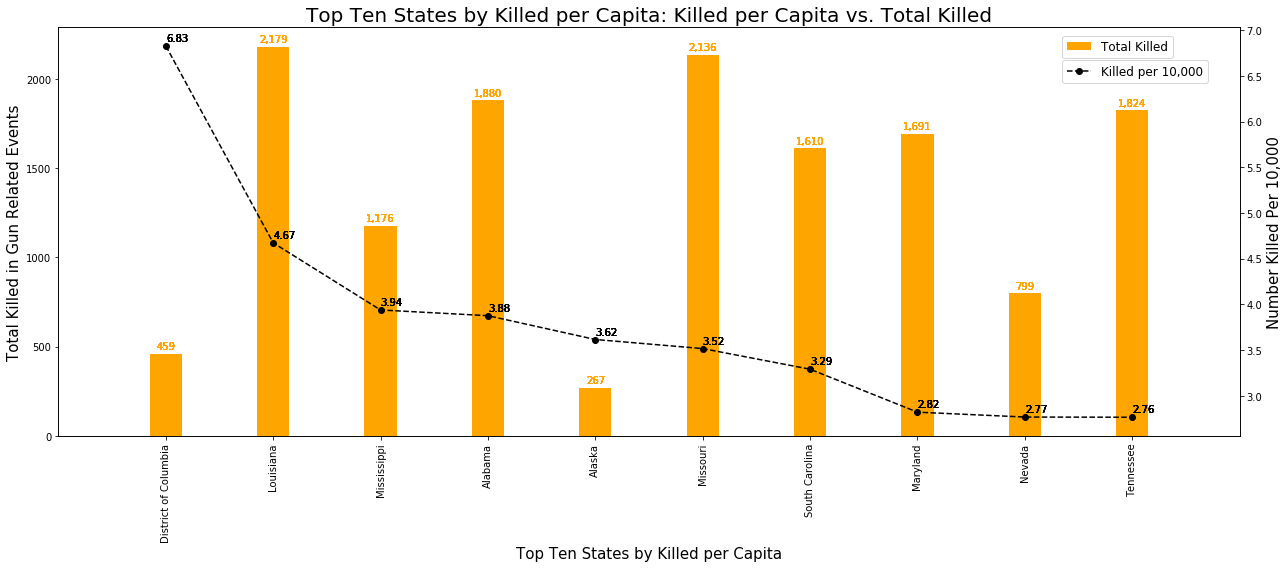

In [12]:
## plot the top ten states for killed per capita showing killed per capita vs. total killed
x=np.arange(len(k_topten))
width=0.30

fig, killed_10k=plt.subplots(figsize=(18,8))
killed_10k.bar(x=x, height=killed,label='Total Killed',color='orange', width=width, zorder=1)
killed_10k2=killed_10k.twinx()
killed_10k2.plot(x, k_10k,'o--k',label='Killed per 10,000', zorder=2)
killed_10k2.set_ylabel('Number Killed Per 10,000',fontsize=15) 
killed_10k.set_xticks(x)
killed_10k.set_xticklabels(k_topten, rotation='vertical', fontsize=10)
killed_10k.set_xlim(-1,10)
killed_10k.set_ylabel('Total Killed in Gun Related Events',fontsize=15)
killed_10k.set_xlabel('Top Ten States by Killed per Capita',fontsize=15)
killed_10k.set_title('Top Ten States by Killed per Capita: Killed per Capita vs. Total Killed',fontsize=20)
killed_10k.legend(bbox_to_anchor=(.85, .98), loc='upper left', borderaxespad=0.,fontsize='large')
killed_10k2.legend(bbox_to_anchor=(.85, .92), loc='upper left', borderaxespad=0.,fontsize='large')
for num in x:
    for inc in k_10k: 
        killed_10k2.text(num,k_10k[num]+.05,f'{round(k_10k[num],2)}',ha='left')
for num in x:
    for inc in killed: 
        killed_10k.text(num,killed[num]+25,"{:,}".format(killed[num]),c='orange',ha='center')
plt.tight_layout()
plt.savefig('output/Top10KilledperCapita.png')
plt.show()

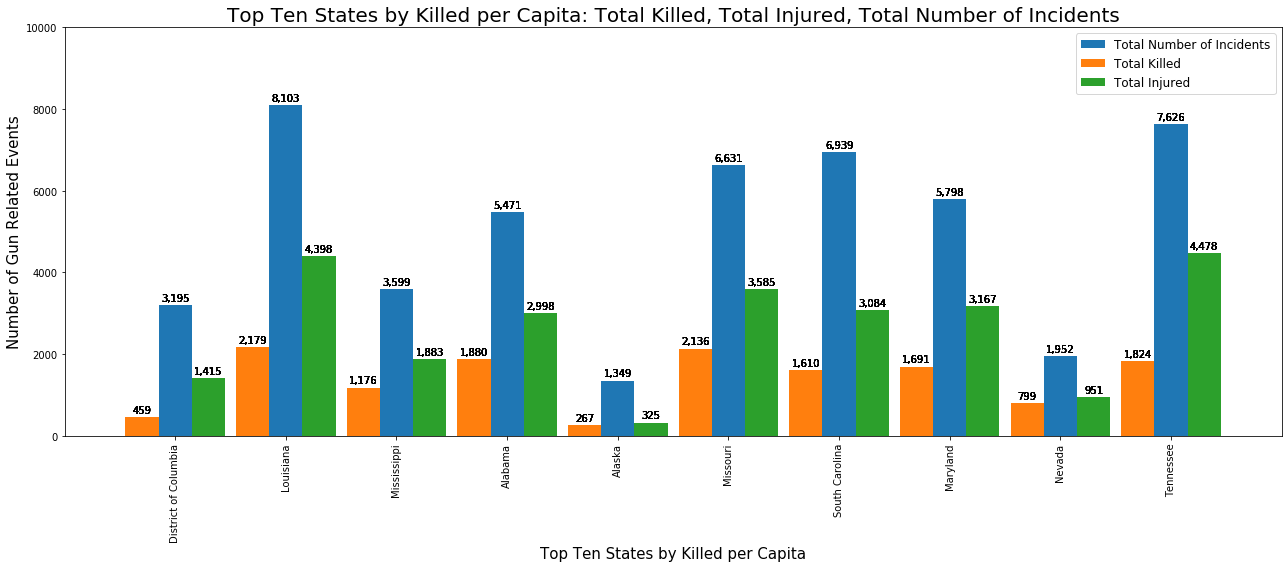

In [13]:
## plot total incidents, killed, injured for top ten states by killed per capita
x=np.arange(len(k_topten))
width=0.30
# print(x)

fig, ktt=plt.subplots(figsize=(18,8))
ktt.bar(x=x, height=k_topten_df['# of incidents'],label='Total Number of Incidents', width=width)
ktt.bar(x=x-width, height=k_topten_df['total_killed'],label='Total Killed', width=width)
ktt.bar(x=x+width, height=k_topten_df['total_injured'],label='Total Injured', width=width)
ktt.set_xticks(x)
ktt.set_xticklabels(k_topten)
ktt.set_ylabel('Number of Gun Related Events', fontsize=15) 
ktt.set_xlabel('Top Ten States by Killed per Capita', fontsize=15)
ktt.set_title('Top Ten States by Killed per Capita: Total Killed, Total Injured, Total Number of Incidents', fontsize=20)
plt.legend(fontsize='large')
plt.xlim(-1,10)
plt.ylim(0,10000)
plt.xticks(rotation='vertical')
for num in x:
    for inc in killed: 
        plt.text(num-.3,killed[num]+100,"{:,}".format(killed[num]),ha='center')
for num in x:
    for inc in incidents: 
        plt.text(num,incidents[num]+100,"{:,}".format(incidents[num]),ha='center')
for num in x:
    for inc in injured: 
        plt.text(num+.3,injured[num]+100,"{:,}".format(injured[num]),ha='center') 
plt.tight_layout()
plt.savefig('output/Top10KilledperCapita_Totals.png')
plt.show()

# Top Ten States by Number Injured per capita 
Looking at the data specific to the top ten states by injured per capita (incidents per capita by 10,000)

In [14]:
## sort dataframe by injured per capita greatest to least
totals_df=totals_df.sort_values(by = ['in per 10k'], ascending  = False)
totals_df=totals_df.reset_index(drop=True)
totals_df.head(10)

,state,total_killed,total_injured,# of incidents,Population,incidents per capita,k per 10k,in per 10k
0,District of Columbia,459,1415,3195,672391.0,47.516995,6.826385,21.044303
1,Illinois,3409,13514,17556,12854526.0,13.657446,2.651984,10.513029
2,Louisiana,2179,4398,8103,4663461.0,17.375507,4.672495,9.430764
3,Delaware,217,853,1685,943732.0,17.854645,2.299382,9.038583
4,Tennessee,1824,4478,7626,6597381.0,11.559132,2.764733,6.787542
5,Mississippi,1176,1883,3599,2986220.0,12.052026,3.938089,6.305631
6,South Carolina,1610,3084,6939,4893444.0,14.180197,3.290116,6.302310
7,Alabama,1880,2998,5471,4850771.0,11.278619,3.875673,6.180461
8,Missouri,2136,3585,6631,6075300.0,10.914687,3.515876,5.900943
9,Maryland,1691,3167,5798,5996079.0,9.669652,2.820176,5.281785


In [15]:
## create lists for columns that will need to become labels on plot
iten=totals_df.iloc[0:10,0]

i_topten=[]
for s in iten:
    i_topten.append(s)
i_topten

['District of Columbia',
 'Illinois',
 'Louisiana',
 'Delaware',
 'Tennessee',
 'Mississippi',
 'South Carolina',
 'Alabama',
 'Missouri',
 'Maryland']

In [16]:
## create a dataframe for subset of the totals dataframe for top ten states by injured per capita
totals_df['state'].isin(i_topten)
i_topten_df=totals_df[totals_df['state'].isin(i_topten)]   
i_topten_df

,state,total_killed,total_injured,# of incidents,Population,incidents per capita,k per 10k,in per 10k
0,District of Columbia,459,1415,3195,672391.0,47.516995,6.826385,21.044303
1,Illinois,3409,13514,17556,12854526.0,13.657446,2.651984,10.513029
2,Louisiana,2179,4398,8103,4663461.0,17.375507,4.672495,9.430764
3,Delaware,217,853,1685,943732.0,17.854645,2.299382,9.038583
4,Tennessee,1824,4478,7626,6597381.0,11.559132,2.764733,6.787542
5,Mississippi,1176,1883,3599,2986220.0,12.052026,3.938089,6.305631
6,South Carolina,1610,3084,6939,4893444.0,14.180197,3.290116,6.302310
7,Alabama,1880,2998,5471,4850771.0,11.278619,3.875673,6.180461
8,Missouri,2136,3585,6631,6075300.0,10.914687,3.515876,5.900943
9,Maryland,1691,3167,5798,5996079.0,9.669652,2.820176,5.281785


In [17]:
## create lists for columns that will need to become labels on plot
killed=i_topten_df['total_killed'].tolist()
injured=i_topten_df['total_injured'].tolist()
incidents=i_topten_df['# of incidents'].tolist()
i_10k=i_topten_df['in per 10k'].tolist()

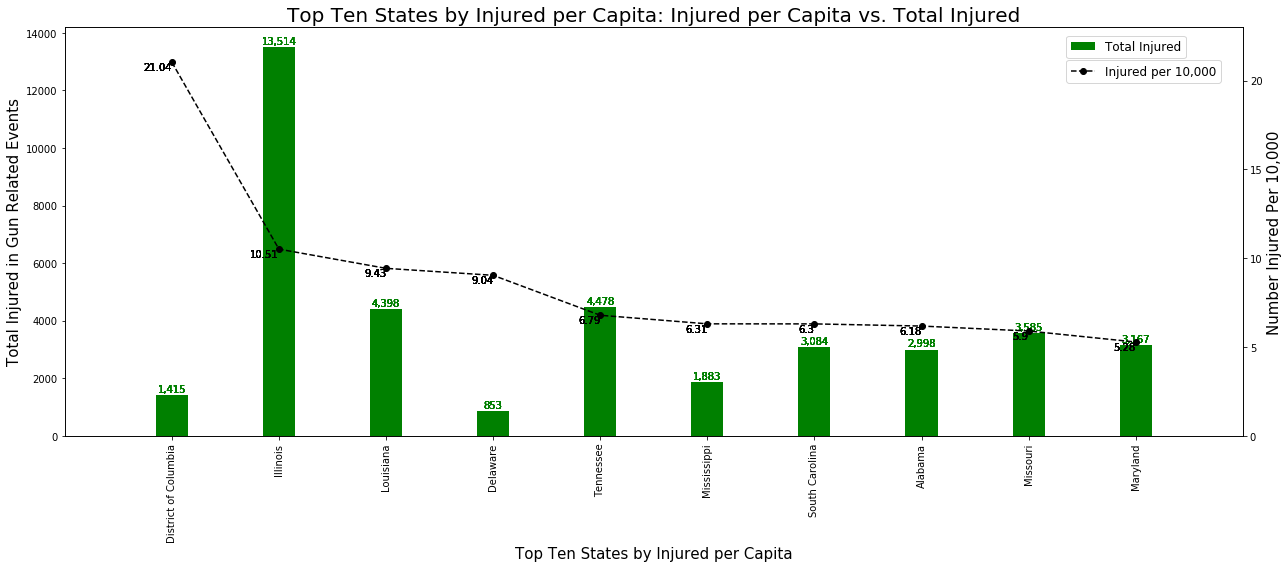

In [18]:
## plot the top ten states for injured per capita showing injured per capita vs. total injured
x=np.arange(len(i_topten))
width=0.30

fig, injured_10k=plt.subplots(figsize=(18,8))
injured_10k.bar(x=x, height=injured, label='Total Injured',color='green', width=width)
injured_10k2=injured_10k.twinx()
injured_10k2.plot(x, i_10k,'o--k',label='Injured per 10,000')
injured_10k2.set_ylabel('Number Injured Per 10,000',fontsize=15) 
injured_10k2.set_ylim(0,23)
injured_10k.set_xticks(x)
injured_10k.set_xticklabels(i_topten, rotation='vertical', fontsize=10)
injured_10k.set_xlim(-1,10)
injured_10k.set_ylabel('Total Injured in Gun Related Events',fontsize=15)
injured_10k.set_xlabel('Top Ten States by Injured per Capita',fontsize=15)
injured_10k.set_title('Top Ten States by Injured per Capita: Injured per Capita vs. Total Injured',fontsize=20)
injured_10k2.legend(bbox_to_anchor=(.85, .92), loc='upper left', borderaxespad=0.,fontsize='large')
injured_10k.legend(bbox_to_anchor=(.85, .98), loc='upper left', borderaxespad=0.,fontsize='large')
for num in x:
    for inc in i_10k: 
        injured_10k2.text(num,i_10k[num],f'{round(i_10k[num],2)}',ha='right',va='top')
for num in x:
    for inc in injured: 
        injured_10k.text(num,injured[num]+100,"{:,}".format(injured[num]),c='green',ha='center')
plt.tight_layout()
plt.savefig('output/Top10InjuredperCapita.png')
plt.show()

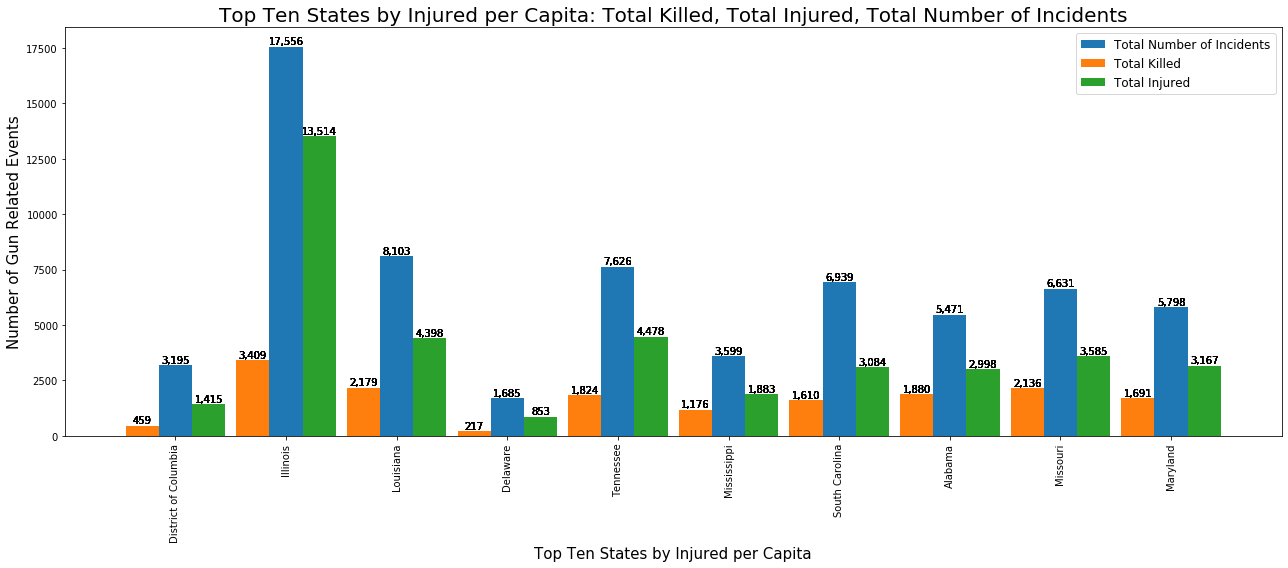

In [19]:
## plot total incidents, killed, injured for top ten states by injured per capita
fig, itt=plt.subplots(figsize=(18,8))
itt.bar(x=x, height=i_topten_df['# of incidents'],label='Total Number of Incidents', width=width)
itt.bar(x=x-width, height=i_topten_df['total_killed'],label='Total Killed', width=width)
itt.bar(x=x+width, height=i_topten_df['total_injured'],label='Total Injured', width=width)
itt.set_xticks(x)
itt.set_xticklabels(i_topten)
itt.set_ylabel('Number of Gun Related Events', fontsize=15) 
itt.set_xlabel('Top Ten States by Injured per Capita', fontsize=15)
itt.set_title('Top Ten States by Injured per Capita: Total Killed, Total Injured, Total Number of Incidents', fontsize=20)
plt.legend(fontsize='large')
plt.xlim(-1,10)
plt.xticks(rotation='vertical')
for num in x:
    for inc in killed: 
        plt.text(num-.3,killed[num]+100,"{:,}".format(killed[num]),ha='center')
for num in x:
    for inc in incidents: 
        plt.text(num,incidents[num]+100,"{:,}".format(incidents[num]),ha='center')
for num in x:
    for inc in injured: 
        plt.text(num+.3,injured[num]+100,"{:,}".format(injured[num]),ha='center') 
plt.tight_layout()
plt.savefig('output/Top10InjuredperCapita_Totals.png')
plt.show()

# Top Ten States by Killed (not per capita)
Look at how the top ten state results varry when looking at actual counts not per capita. 

In [20]:
## sort totals df by total killed greatest to least
totals_df
totals_df=totals_df.sort_values(by = ['total_killed'], ascending  = False)
totals_df=totals_df.reset_index(drop=True)
totals_df.head(10)

,state,total_killed,total_injured,# of incidents,Population,incidents per capita,k per 10k,in per 10k
0,California,5562,7644,16306,38982847.0,4.182865,1.426781,1.960862
1,Texas,5046,6106,13577,27419612.0,4.951565,1.840289,2.226873
2,Florida,3909,7072,15029,20278447.0,7.411317,1.927662,3.487447
3,Illinois,3409,13514,17556,12854526.0,13.657446,2.651984,10.513029
4,Ohio,2508,5703,10244,11609756.0,8.823614,2.160252,4.912248
5,Georgia,2456,4056,8925,10201635.0,8.748598,2.407457,3.975833
6,Pennsylvania,2395,5056,8929,12790505.0,6.980960,1.872483,3.952932
7,North Carolina,2225,4629,8739,10052564.0,8.693305,2.213366,4.604795
8,Louisiana,2179,4398,8103,4663461.0,17.375507,4.672495,9.430764
9,Missouri,2136,3585,6631,6075300.0,10.914687,3.515876,5.900943


In [21]:
## create a list of the top ten states by total killed numbers
kraw=totals_df.iloc[0:10,0]

kraw_topten=[]
for s in kraw:
    kraw_topten.append(s)
kraw_topten

['California',
 'Texas',
 'Florida',
 'Illinois',
 'Ohio',
 'Georgia',
 'Pennsylvania',
 'North Carolina',
 'Louisiana',
 'Missouri']

In [22]:
## create new dataframe including only the top ten states based on total killed
totals_df['state'].isin(kraw_topten)
kraw_topten_df=totals_df[totals_df['state'].isin(kraw_topten)]   
kraw_topten_df

,state,total_killed,total_injured,# of incidents,Population,incidents per capita,k per 10k,in per 10k
0,California,5562,7644,16306,38982847.0,4.182865,1.426781,1.960862
1,Texas,5046,6106,13577,27419612.0,4.951565,1.840289,2.226873
2,Florida,3909,7072,15029,20278447.0,7.411317,1.927662,3.487447
3,Illinois,3409,13514,17556,12854526.0,13.657446,2.651984,10.513029
4,Ohio,2508,5703,10244,11609756.0,8.823614,2.160252,4.912248
5,Georgia,2456,4056,8925,10201635.0,8.748598,2.407457,3.975833
6,Pennsylvania,2395,5056,8929,12790505.0,6.980960,1.872483,3.952932
7,North Carolina,2225,4629,8739,10052564.0,8.693305,2.213366,4.604795
8,Louisiana,2179,4398,8103,4663461.0,17.375507,4.672495,9.430764
9,Missouri,2136,3585,6631,6075300.0,10.914687,3.515876,5.900943


In [23]:
## create lists for fields to be plotted 
killed=kraw_topten_df['total_killed'].tolist()
injured=kraw_topten_df['total_injured'].tolist()
incidents=kraw_topten_df['# of incidents'].tolist()
kraw_10k=kraw_topten_df['k per 10k'].tolist()
# print(f'{killed},{injured},{incidents},{kraw_10k}')

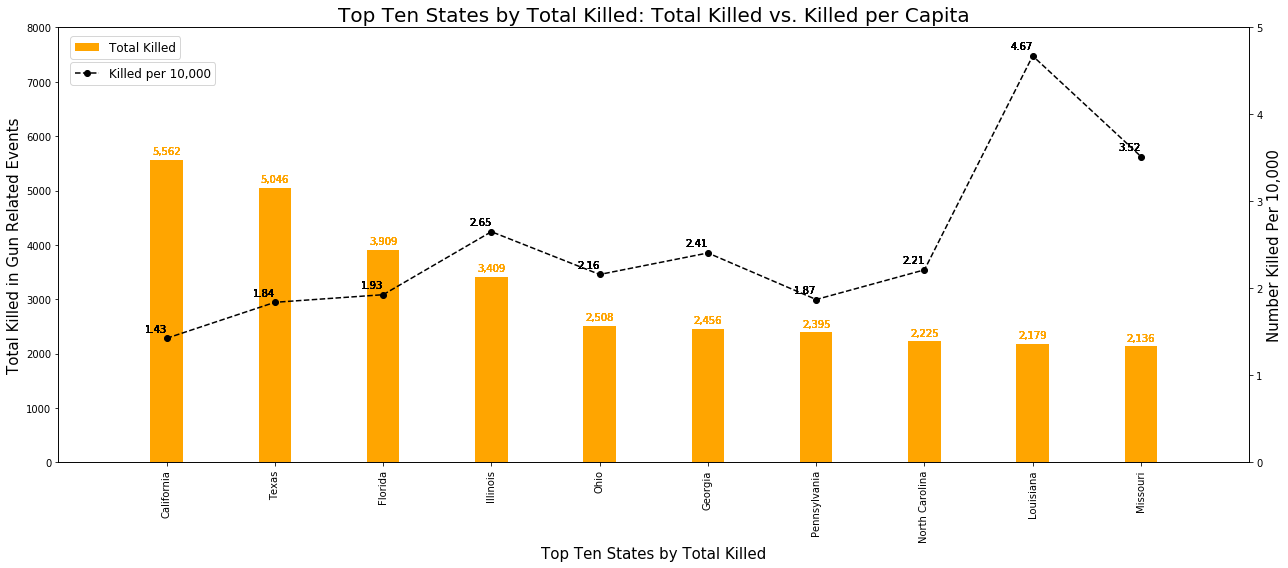

In [24]:
## plot the top ten states for total killed showing total killed vs. killed per capita
x=np.arange(len(kraw_topten))
width=0.30
# print(x)

fig, krawplt2=plt.subplots(figsize=(18,8))
krawplt2.bar(x=x, height=killed,label='Total Killed',color='orange', width=width)
krawplt22=krawplt2.twinx()
krawplt22.plot(x, kraw_10k,'o--k',label='Killed per 10,000')
krawplt22.set_ylabel('Number Killed Per 10,000',fontsize=15)
krawplt22.set_ylim(0,5)
krawplt2.set_xticks(x)
krawplt2.set_xticklabels(kraw_topten, rotation='vertical', fontsize=10)
krawplt2.set_xlim(-1,10)
krawplt2.set_ylim(0,8000)
krawplt2.set_ylabel('Total Killed in Gun Related Events',fontsize=15) 
krawplt2.set_xlabel('Top Ten States by Total Killed',fontsize=15)
krawplt2.set_title('Top Ten States by Total Killed: Total Killed vs. Killed per Capita',fontsize=20)
krawplt2.legend(bbox_to_anchor=(.01, .98), loc='upper left', borderaxespad=0.,fontsize='large')
krawplt22.legend(bbox_to_anchor=(.01, .92), loc='upper left', borderaxespad=0.,fontsize='large')
for num in x:
    for inc in killed: 
        krawplt2.text(num,killed[num]+100,"{:,}".format(killed[num]),c='orange',ha='center')
for num in x:
    for inc in kraw_10k: 
        krawplt22.text(num,kraw_10k[num]+.05,f'{round(kraw_10k[num],2)}',ha='right', va='bottom')
plt.tight_layout()
plt.savefig('output/TotalKilledTop10.png')
plt.show()

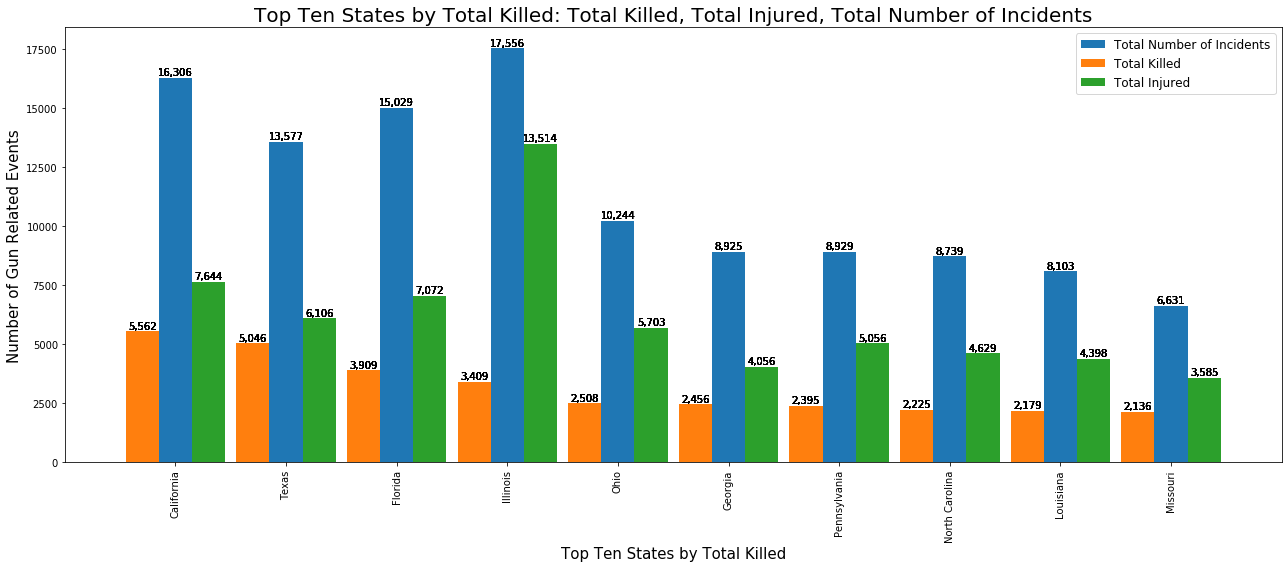

In [25]:
## plot total number of incidents, total killed and total injured for top ten states by total killed 
fig, krawplt=plt.subplots(figsize=(18,8))
krawplt.bar(x=x, height=incidents,label='Total Number of Incidents', width=width)
krawplt.bar(x=x-width, height=killed,label='Total Killed', width=width)
krawplt.bar(x=x+width, height=injured,label='Total Injured', width=width)
krawplt.set_xticks(x)
krawplt.set_xticklabels(kraw_topten)
krawplt.set_ylabel('Number of Gun Related Events', fontsize=15) 
krawplt.set_xlabel('Top Ten States by Total Killed', fontsize=15)
krawplt.set_title('Top Ten States by Total Killed: Total Killed, Total Injured, Total Number of Incidents',fontsize=20)
plt.legend(fontsize='large')
plt.xlim(-1,10)
plt.xticks(rotation='vertical')
for num in x:
    for inc in killed: 
        plt.text(num-.3,killed[num]+100,"{:,}".format(killed[num]),ha='center')
for num in x:
    for inc in incidents: 
        plt.text(num,incidents[num]+100,"{:,}".format(incidents[num]),ha='center')
for num in x:
    for inc in injured: 
        plt.text(num+.3,injured[num]+100,"{:,}".format(injured[num]),ha='center') 
plt.tight_layout()
plt.savefig('output/TotalKilledTop10_Totals.png')
plt.show()

# Top Ten States by Injured (not per capita)
Look at how the top ten state results varry when looking at actual counts not per capita. 

In [26]:
## sort totals datafram by total injured greatest to least
totals_df
totals_df=totals_df.sort_values(by = ['total_injured'], ascending  = False)
totals_df=totals_df.reset_index(drop=True)
totals_df.head(10)

,state,total_killed,total_injured,# of incidents,Population,incidents per capita,k per 10k,in per 10k
0,Illinois,3409,13514,17556,12854526.0,13.657446,2.651984,10.513029
1,California,5562,7644,16306,38982847.0,4.182865,1.426781,1.960862
2,Florida,3909,7072,15029,20278447.0,7.411317,1.927662,3.487447
3,Texas,5046,6106,13577,27419612.0,4.951565,1.840289,2.226873
4,Ohio,2508,5703,10244,11609756.0,8.823614,2.160252,4.912248
5,New York,1705,5059,9712,19798228.0,4.905490,0.861188,2.555279
6,Pennsylvania,2395,5056,8929,12790505.0,6.980960,1.872483,3.952932
7,North Carolina,2225,4629,8739,10052564.0,8.693305,2.213366,4.604795
8,Tennessee,1824,4478,7626,6597381.0,11.559132,2.764733,6.787542
9,Louisiana,2179,4398,8103,4663461.0,17.375507,4.672495,9.430764


In [27]:
## create list of top ten states by total injured
iraw=totals_df.iloc[0:10,0]

iraw_topten=[]
for s in iraw:
    iraw_topten.append(s)
iraw_topten

['Illinois',
 'California',
 'Florida',
 'Texas',
 'Ohio',
 'New York',
 'Pennsylvania',
 'North Carolina',
 'Tennessee',
 'Louisiana']

In [28]:
## create dataframe including only the top ten state by total injured
totals_df['state'].isin(iraw_topten)
iraw_topten_df=totals_df[totals_df['state'].isin(iraw_topten)]   
iraw_topten_df

,state,total_killed,total_injured,# of incidents,Population,incidents per capita,k per 10k,in per 10k
0,Illinois,3409,13514,17556,12854526.0,13.657446,2.651984,10.513029
1,California,5562,7644,16306,38982847.0,4.182865,1.426781,1.960862
2,Florida,3909,7072,15029,20278447.0,7.411317,1.927662,3.487447
3,Texas,5046,6106,13577,27419612.0,4.951565,1.840289,2.226873
4,Ohio,2508,5703,10244,11609756.0,8.823614,2.160252,4.912248
5,New York,1705,5059,9712,19798228.0,4.905490,0.861188,2.555279
6,Pennsylvania,2395,5056,8929,12790505.0,6.980960,1.872483,3.952932
7,North Carolina,2225,4629,8739,10052564.0,8.693305,2.213366,4.604795
8,Tennessee,1824,4478,7626,6597381.0,11.559132,2.764733,6.787542
9,Louisiana,2179,4398,8103,4663461.0,17.375507,4.672495,9.430764


In [29]:
## create lists for fields to be plotted 
killed=iraw_topten_df['total_killed'].tolist()
injured=iraw_topten_df['total_injured'].tolist()
incidents=iraw_topten_df['# of incidents'].tolist()
iraw_10k=iraw_topten_df['k per 10k'].tolist()

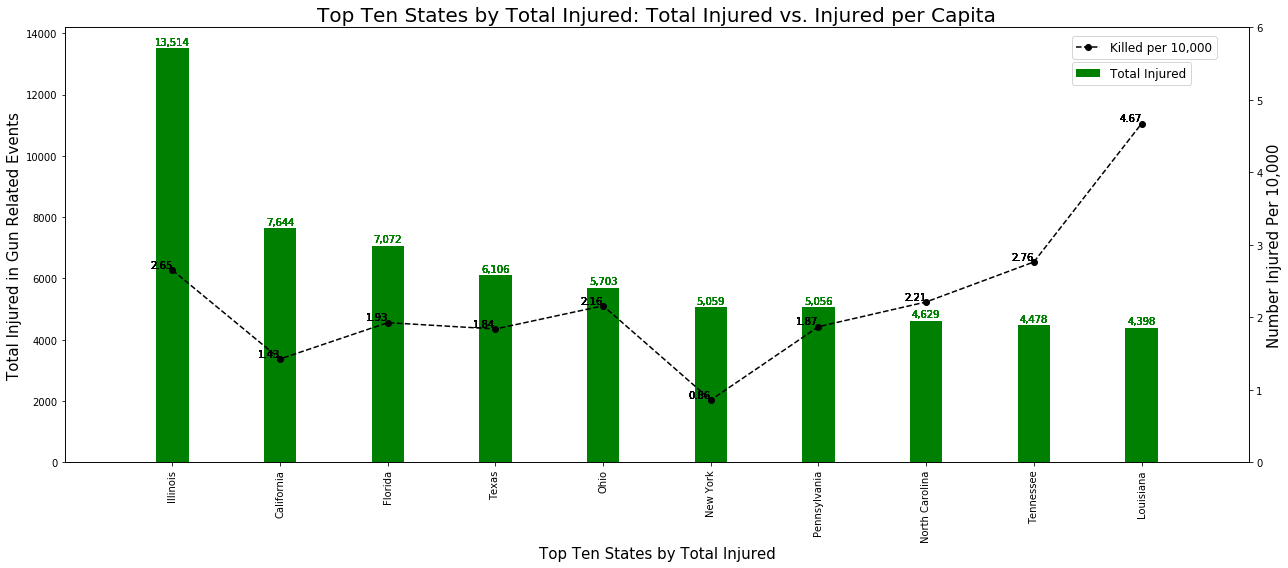

In [30]:
## plot the top ten states for total injured showing total injured vs. injured per capita
x=np.arange(len(iraw_topten))
width=0.30

fig, irawplt2=plt.subplots(figsize=(18,8))
irawplt2.bar(x=x, height=injured ,label='Total Injured',color='green', width=width)
irawplt22=irawplt2.twinx()
irawplt22.plot(x, iraw_10k,'o--k',label='Killed per 10,000')
irawplt22.set_ylabel('Number Injured Per 10,000',fontsize=15)
irawplt22.set_ylim(0,6)
irawplt2.set_xticks(x)
irawplt2.set_xticklabels(iraw_topten, rotation='vertical', fontsize=10)
irawplt2.set_xlim(-1,10)
# irawplt2.set_ylim(0,15000)
irawplt2.set_ylabel('Total Injured in Gun Related Events',fontsize=15) 
irawplt2.set_xlabel('Top Ten States by Total Injured',fontsize=15)
irawplt2.set_title('Top Ten States by Total Injured: Total Injured vs. Injured per Capita',fontsize=20)
irawplt2.legend(bbox_to_anchor=(.85, .92), loc='upper left', borderaxespad=0.,fontsize='large')
irawplt22.legend(bbox_to_anchor=(.85, .98), loc='upper left', borderaxespad=0.,fontsize='large')
for num in x:
    for inc in injured: 
        irawplt2.text(num,injured[num]+100,"{:,}".format(injured[num]),c='green',ha='center')
for num in x:
    for inc in iraw_10k: 
        irawplt22.text(num,iraw_10k[num],f'{round(iraw_10k[num],2)}',ha='right', va='bottom')
plt.tight_layout()
plt.savefig('output/TotalInjuredTop10.png')
plt.show()

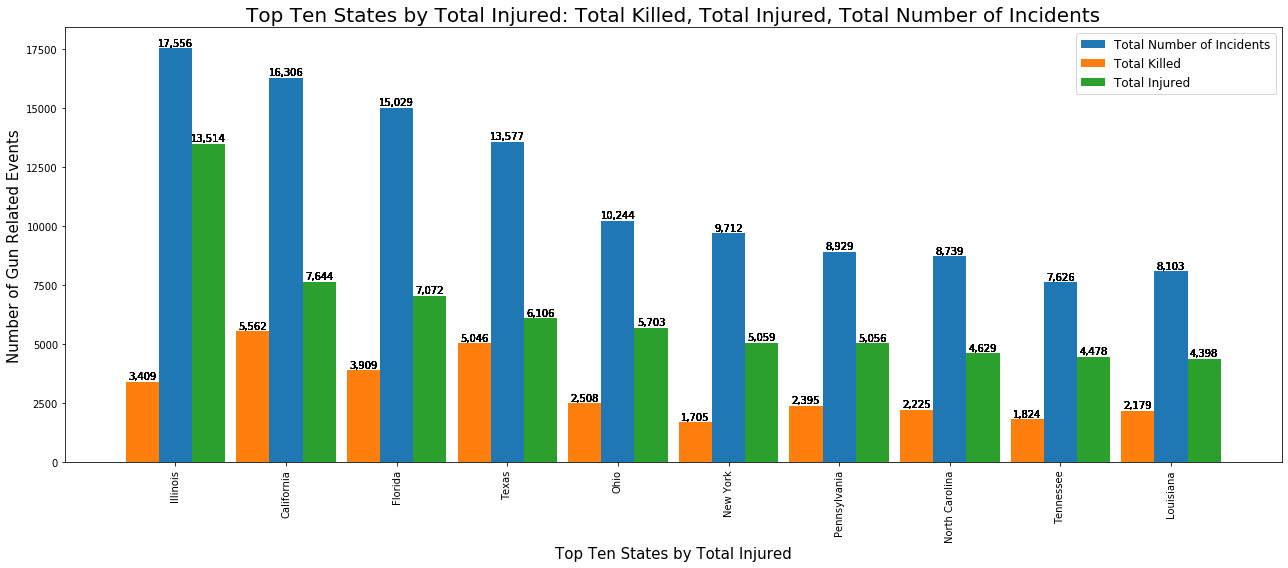

In [31]:
## plot total number of incidents, total killed and total injured for top ten states by total injured 
fig, irawplt=plt.subplots(figsize=(18,8))
irawplt.bar(x=x, height=incidents,label='Total Number of Incidents', width=width)
irawplt.bar(x=x-width, height=killed,label='Total Killed', width=width)
irawplt.bar(x=x+width, height=injured,label='Total Injured', width=width)
irawplt.set_xticks(x)
irawplt.set_xticklabels(iraw_topten)
irawplt.set_ylabel('Number of Gun Related Events', fontsize=15) 
irawplt.set_xlabel('Top Ten States by Total Injured', fontsize=15)
irawplt.set_title('Top Ten States by Total Injured: Total Killed, Total Injured, Total Number of Incidents', fontsize=20)
plt.legend(fontsize='large')
plt.xlim(-1,10)
plt.xticks(rotation='vertical')
for num in x:
    for inc in killed: 
        plt.text(num-.3,killed[num]+100,"{:,}".format(killed[num]),ha='center')
for num in x:
    for inc in incidents: 
        plt.text(num,incidents[num]+100,"{:,}".format(incidents[num]),ha='center')
for num in x:
    for inc in injured: 
        plt.text(num+.3,injured[num]+100,"{:,}".format(injured[num]),ha='center') 
plt.tight_layout()
plt.savefig('output/TotalInjuredTop10_Totals.png')
plt.show()